In [2]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(42)

In [4]:
df = pd.read_csv(r"D:\LEARNING\PYTORCH\DATASET\fmnist_small.csv")

In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


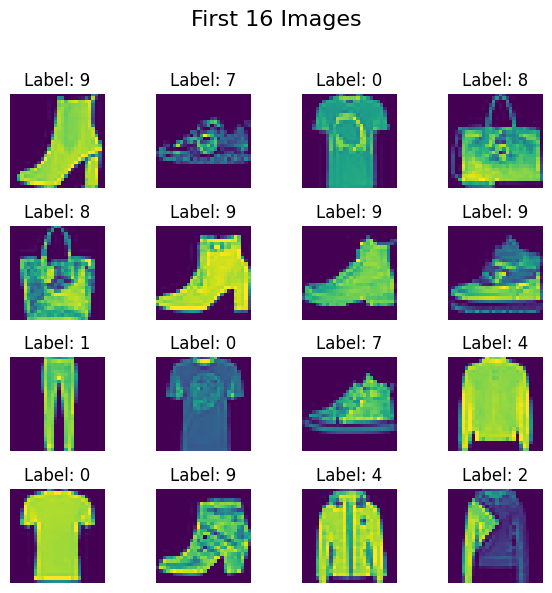

In [7]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(6,6))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [8]:

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# Create Custom Dataset Class

class CustomDataset(Dataset):

    def __init__(self,features,labels):
        self.features = torch.tensor(features,dtype=torch.float32)
        self.labels= torch.tensor(labels,dtype=torch.long)



    def __len__(self):
        return len(self.features)


    def __getitem__(self, index):
        return self.features[index],self.labels[index]

In [12]:
# create train dataset object

train_dataset = CustomDataset(X_train,y_train)

In [15]:
len(train_dataset[0])

2

In [16]:
test_dataset = CustomDataset(X_test,y_test)

In [17]:
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False)

In [20]:
# Define NN Class

class MyNN(nn.Module):

    def __init__(self,num_features):

        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)

        )


    def forward(self,x):
        return self.model(x)

In [21]:
# set learning rate and epochs

epochs = 100
learning_rate = 0.1

In [22]:
# instatiate the model 

model = MyNN(X_train.shape[1])

#loss function

criteria = nn.CrossEntropyLoss()

# Optimiser

optimiser = optim.SGD(model.parameters(),lr= learning_rate)

In [25]:
for i in train_loader:
    print(i)
    break

[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([6, 8, 7, 0, 2, 0, 5, 9, 4, 9, 0, 1, 7, 0, 7, 7, 3, 7, 0, 2, 5, 4, 8, 0,
        8, 9, 2, 5, 4, 1, 5, 8])]


In [27]:
len(train_loader)

150

In [28]:
# training Loops

for epoch in range(epochs):
    total_epoch_loss =0
    for batch_features,batch_labels in train_loader:

        # forward pass
        outputs = model.forward(batch_features)



        # calculate loss

        loss = criteria(outputs,batch_labels)
        


        # back pass
        optimiser.zero_grad()
        loss.backward()

        # update grad
        optimiser.step()
        total_epoch_loss+=loss.item()

    avg_loss=total_epoch_loss/len(train_loader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')






Epoch: 1 , Loss: 1.3307462537288666
Epoch: 2 , Loss: 0.7780523137251536
Epoch: 3 , Loss: 0.6681371422608694
Epoch: 4 , Loss: 0.5719335437814395
Epoch: 5 , Loss: 0.535000351468722
Epoch: 6 , Loss: 0.49791017800569537
Epoch: 7 , Loss: 0.4670260386168957
Epoch: 8 , Loss: 0.4443175694346428
Epoch: 9 , Loss: 0.4203143321474393
Epoch: 10 , Loss: 0.3946714927752813
Epoch: 11 , Loss: 0.3899588977297147
Epoch: 12 , Loss: 0.377073953350385
Epoch: 13 , Loss: 0.35076444208621976
Epoch: 14 , Loss: 0.34032045299808183
Epoch: 15 , Loss: 0.3192043650150299
Epoch: 16 , Loss: 0.3159168836226066
Epoch: 17 , Loss: 0.3014886528750261
Epoch: 18 , Loss: 0.29419136196374895
Epoch: 19 , Loss: 0.280601289148132
Epoch: 20 , Loss: 0.26198700701196986
Epoch: 21 , Loss: 0.26328479995330173
Epoch: 22 , Loss: 0.2505180222292741
Epoch: 23 , Loss: 0.23794857338070868
Epoch: 24 , Loss: 0.23976627166072528
Epoch: 25 , Loss: 0.2314048638691505
Epoch: 26 , Loss: 0.20310984124739964
Epoch: 27 , Loss: 0.20308845202128092
Epo

In [29]:
# set model to eval mode

model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [31]:
total=0
correct =0

with torch.no_grad():


    for batch_features,batch_labels in test_loader:
        outputs=model.forward(batch_features)
        _,predicted = torch.max(outputs,1)
        total = total + batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()


print(correct/total)

0.8408333333333333


In [30]:
len(test_loader)

38

### Learning torch.max

In [43]:
tensor = torch.tensor([[10, 66, 3], [4, 5, 6]])

In [34]:
max_value = torch.max(tensor)
max_value

tensor(6)

In [54]:
max_values, max_indices = torch.max(tensor, dim=0)

In [55]:
max_values

tensor([10, 66,  6])

In [56]:
t= torch.tensor([0.8838,0.9933,0.003,0.77383,0.73737399
                 ])

In [59]:
max_value = torch.max(t,dim=0)

In [60]:
max_value

torch.return_types.max(
values=tensor(0.9933),
indices=tensor(1))